## GARCH

GARCH models are very frequently used as financial and econometric models.

Originates from inflation forecasting of Engle et.al.

It's another very large model class with many extensions.

The main reason/finding/motivation is:

**The variance of the time series is not constant - it is heteroscedastic**

Autoregressive models can be developed for univariate time series data that is stationary (AR), has a trend (ARIMA), and has a seasonal component (SARIMA).

One aspect of a univariate time series that these autoregressive models do not model is a change in the variance over time.

Classically, a time series with modest changes in variance can sometimes be adjusted using a power transform, such as by taking the Log or using a Box-Cox transform.

There are some time series where the variance changes consistently over time. In the context of a time series in the financial domain, this would be called increasing and decreasing volatility.

In time series where the variance is increasing in a systematic way, such as an increasing trend, this property of the series is called heteroskedasticity.

It’s a fancy word from statistics that means changing or unequal variance across the series.

So we leave the stationary-regimes from previous sessions.

Variance and volatility are often used synonymously - but there are some differences. So please be careful when reading papers, texts etc.

More precisely there are:

Three types of volatility measures for securities include:

- Volatility as the conditional standard deviation of daily returns
- Implied volatility that makes use of prices from options markets
- Realised volatility that relies on high frequency financial data to calculate intra-day returns and daily volatility measures


Just to name some wordings: Spot volatility, Historical volatility, Realized Variance......

Let's have a look at some real data:

In [25]:
!pip install yfinance

In [26]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get historical market data
msft = yf.Ticker("MSFT")
hist = msft.history(start="2000-01-01", end="2023-11-22")

In [27]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,36.384127,36.771605,34.717975,36.132267,53228400,0.00,0.0
2000-01-04 00:00:00-05:00,35.202325,36.306635,34.795473,34.911716,54119000,0.00,0.0
2000-01-05 00:00:00-05:00,34.446754,36.074160,33.904286,35.279831,64059600,0.00,0.0
2000-01-06 00:00:00-05:00,34.776085,35.299179,33.594279,34.098000,54976600,0.00,0.0
2000-01-07 00:00:00-05:00,33.671789,34.795474,33.264938,34.543613,62013600,0.00,0.0
...,...,...,...,...,...,...,...
2023-11-15 00:00:00-05:00,371.279999,373.130005,367.109985,369.670013,26860100,0.75,0.0
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.00,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.00,0.0


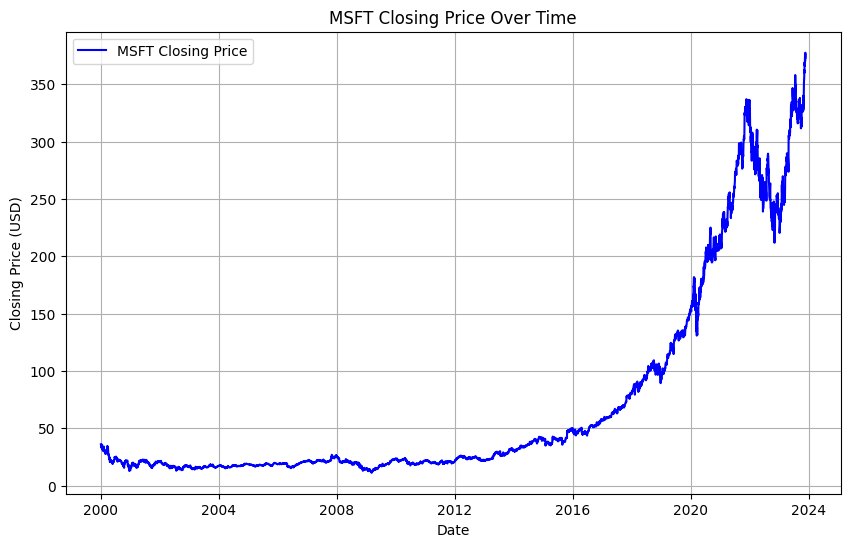

In [28]:
import matplotlib.pyplot as plt


# Plotting the closing prices
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist['Close'], label='MSFT Closing Price', color='blue')
plt.title('MSFT Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


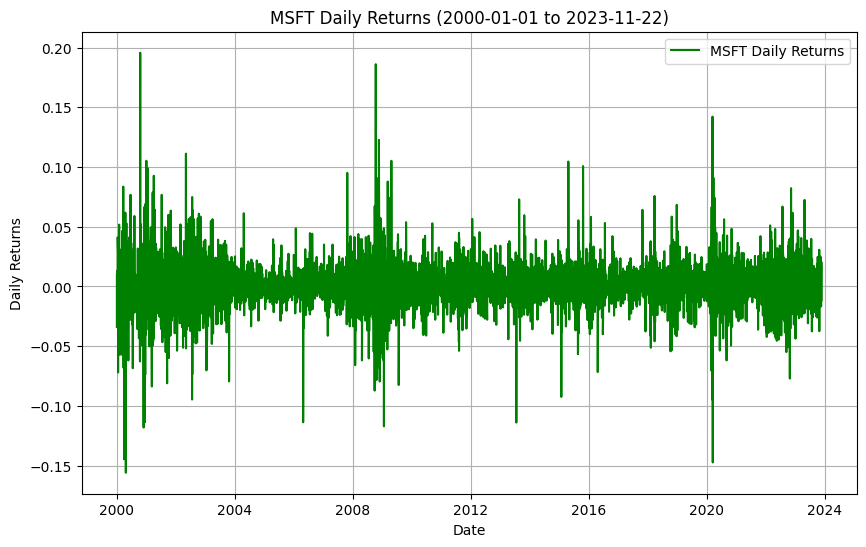

In [29]:
# Calculate daily returns
hist['Daily_Return'] = hist['Close'].pct_change()

# Plotting the returns
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist['Daily_Return'], label='MSFT Daily Returns', color='green')
plt.title('MSFT Daily Returns (2000-01-01 to 2023-11-22)')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

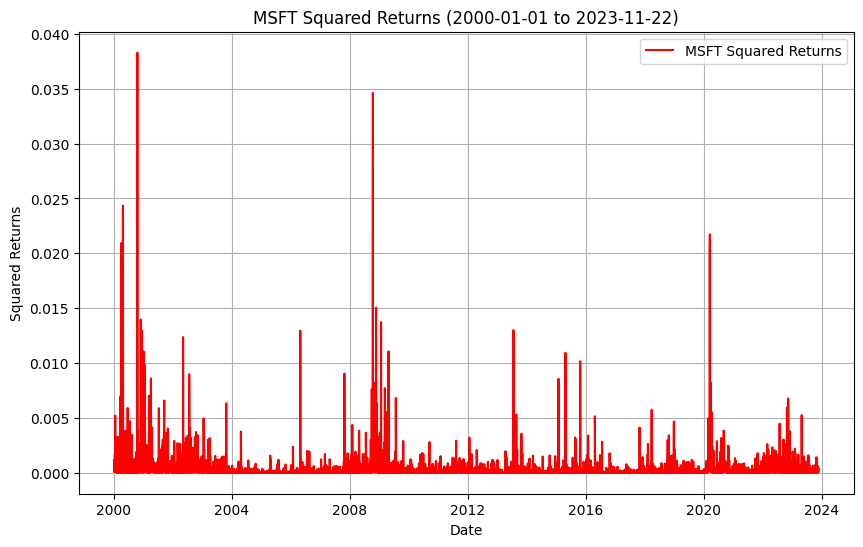

In [30]:
# Calculate returns
hist['Return'] = hist['Close'].pct_change()

# Calculate squared returns
hist['Squared_Return'] = hist['Return'] ** 2

# Plotting the squared returns
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist['Squared_Return'], label='MSFT Squared Returns', color='red')
plt.title('MSFT Squared Returns (2000-01-01 to 2023-11-22)')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.legend()
plt.grid(True)
plt.show()

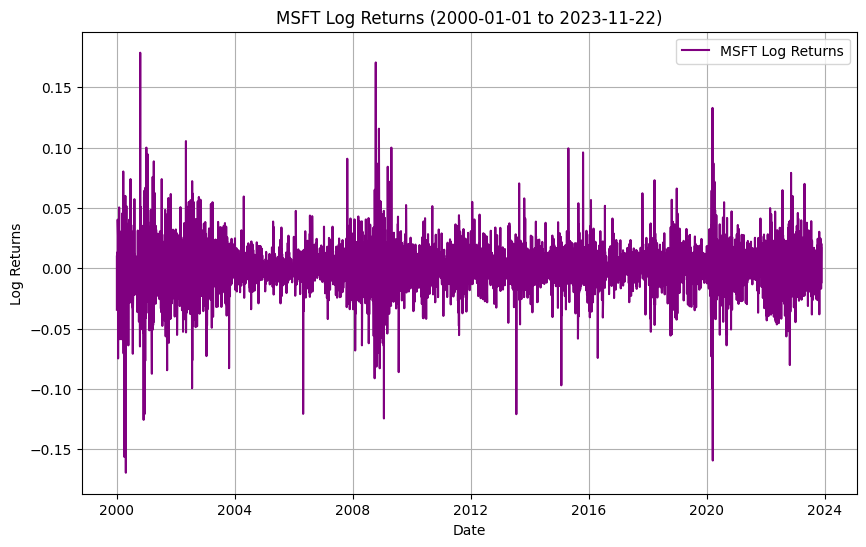

In [31]:
import numpy as np

# Calculate log returns
hist['Log_Return'] = np.log(hist['Close'] / hist['Close'].shift(1))

# Plotting the log returns
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist['Log_Return'], label='MSFT Log Returns', color='purple')
plt.title('MSFT Log Returns (2000-01-01 to 2023-11-22)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

Large changes are associated with other large changes:

- These volatility clusters suggest that variance in t is dependent on variance in t−1

- Conditional variance is dependent on time
- Assumption of i.i.d. returns is violated
- But volatility in 2020 or 2008 would not appear to depend on the volatility in 2001 (no long-run dependence)
- Unconditional volatility is independent of time

These features are also displayed when taking the square or absolute value of the variable

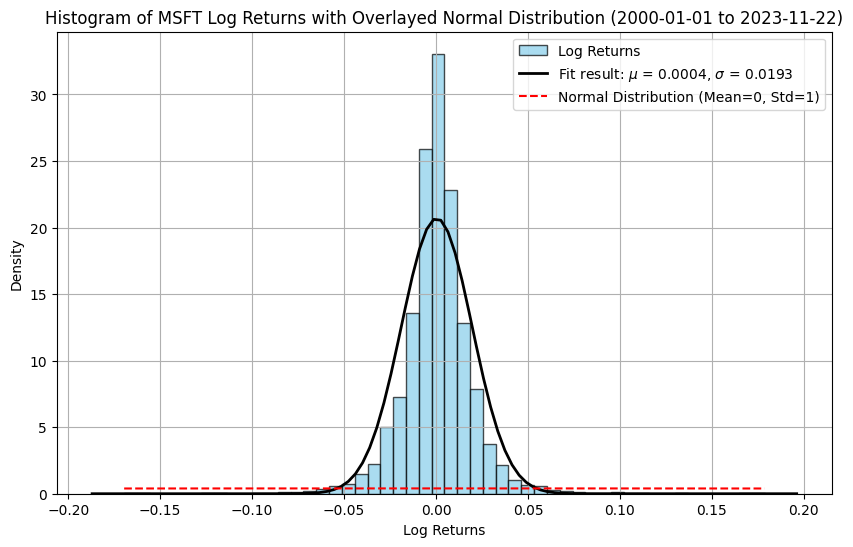

In [32]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Fetch historical market data from January 1, 2000, to November 22, 2023
msft = yf.Ticker("MSFT")
hist = msft.history(start="2000-01-01", end="2023-11-22")

# Calculate log returns
hist['Log_Return'] = np.log(hist['Close'] / hist['Close'].shift(1))

# Generate a histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(hist['Log_Return'].dropna(), bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

# Overlay a normal distribution
mu, std = norm.fit(hist['Log_Return'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit result: $\mu$ = {mu:.4f}, $\sigma$ = {std:.4f}')

x2 = np.linspace(np.min(hist['Log_Return']), np.max(hist['Log_Return']), 100)
y2 = norm.pdf(x2, 0, 1)
plt.plot(x2, y2, 'r--', label='Normal Distribution (Mean=0, Std=1)')

plt.title('Histogram of MSFT Log Returns with Overlayed Normal Distribution (2000-01-01 to 2023-11-22)')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


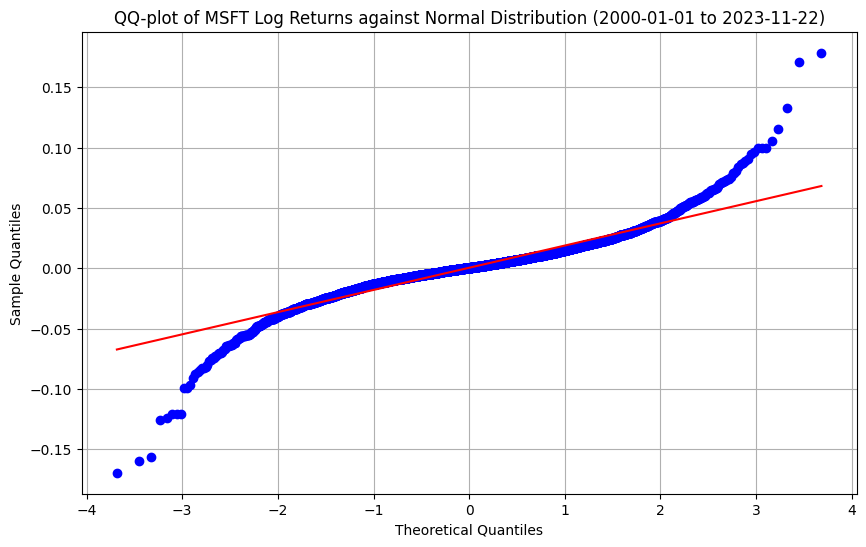

In [33]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

# Fetch historical market data from January 1, 2000, to November 22, 2023
msft = yf.Ticker("MSFT")
hist = msft.history(start="2000-01-01", end="2023-11-22")

# Calculate log returns
hist['Log_Return'] = np.log(hist['Close'] / hist['Close'].shift(1))

# Generate QQ-plot
plt.figure(figsize=(10, 6))
probplot(hist['Log_Return'].dropna(), dist='norm', plot=plt)
plt.title('QQ-plot of MSFT Log Returns against Normal Distribution (2000-01-01 to 2023-11-22)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

During certain periods the distribution of returns have fat tails:

-This decreases with aggregation

-May be partially attributed to volatility clustering although many assets have non-Gaussian returns

Changes in prices are negatively related to changes in volatility:

-"Leverage effects" occur in equity markets

-Volatility rises in response to lower than expected returns


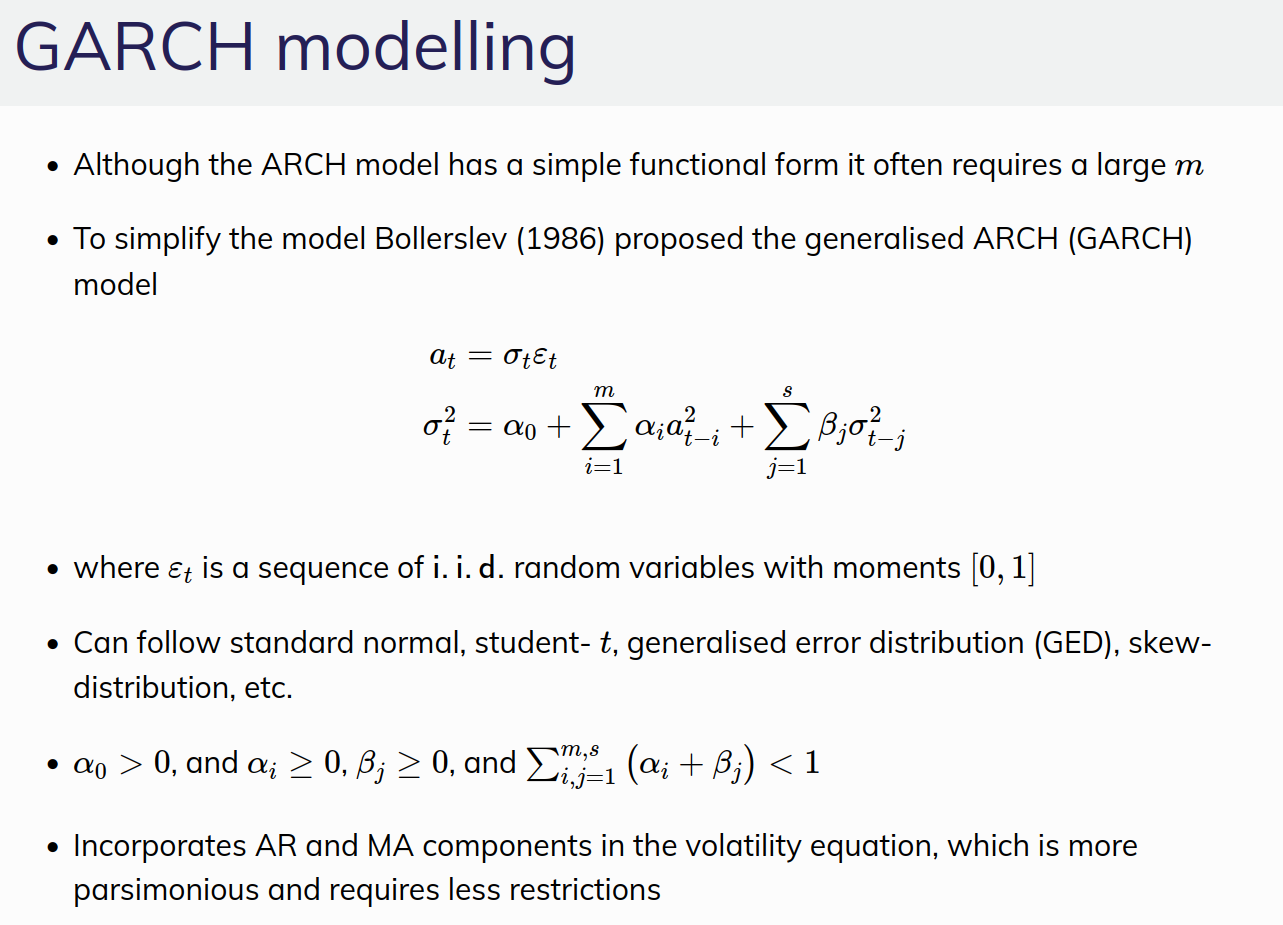

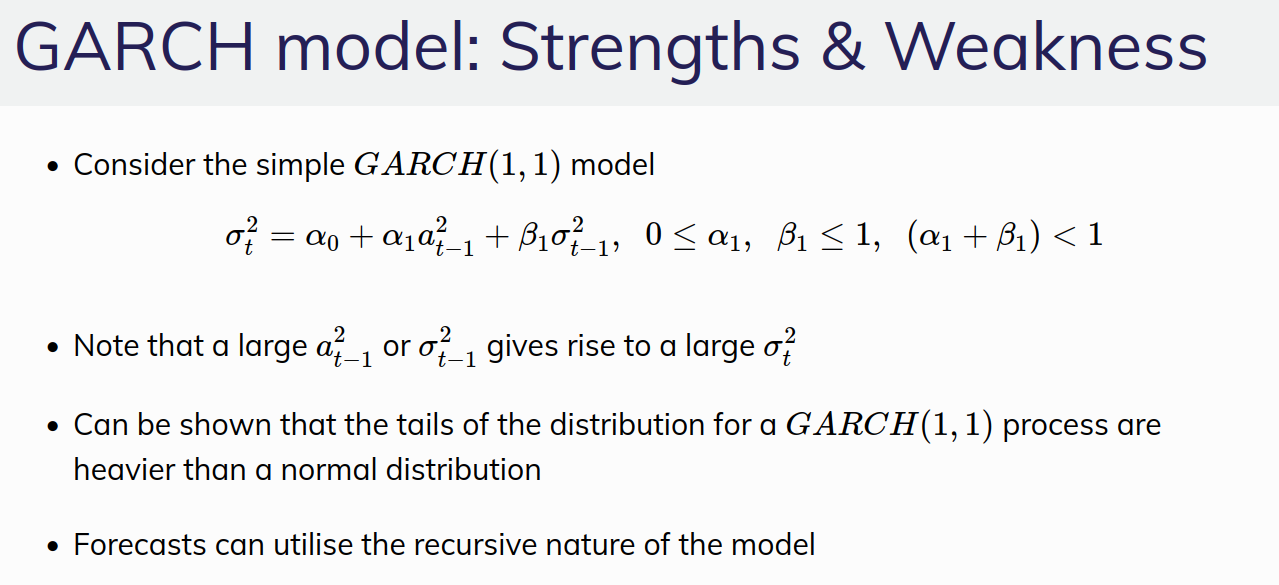

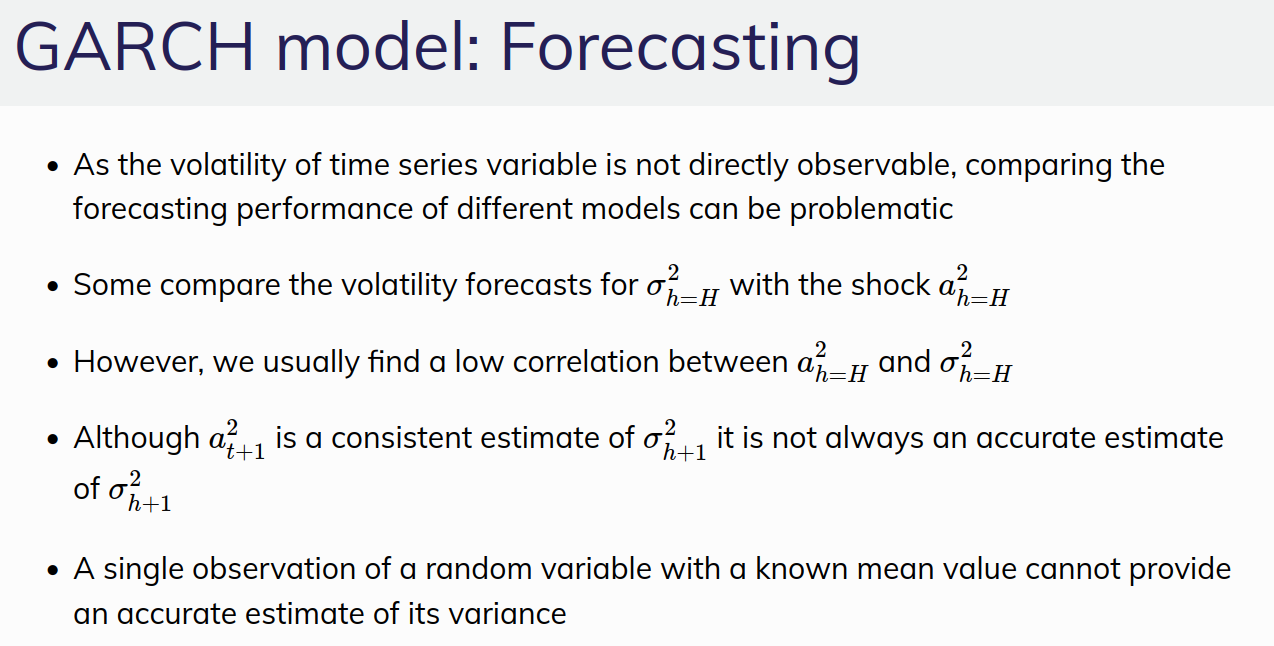

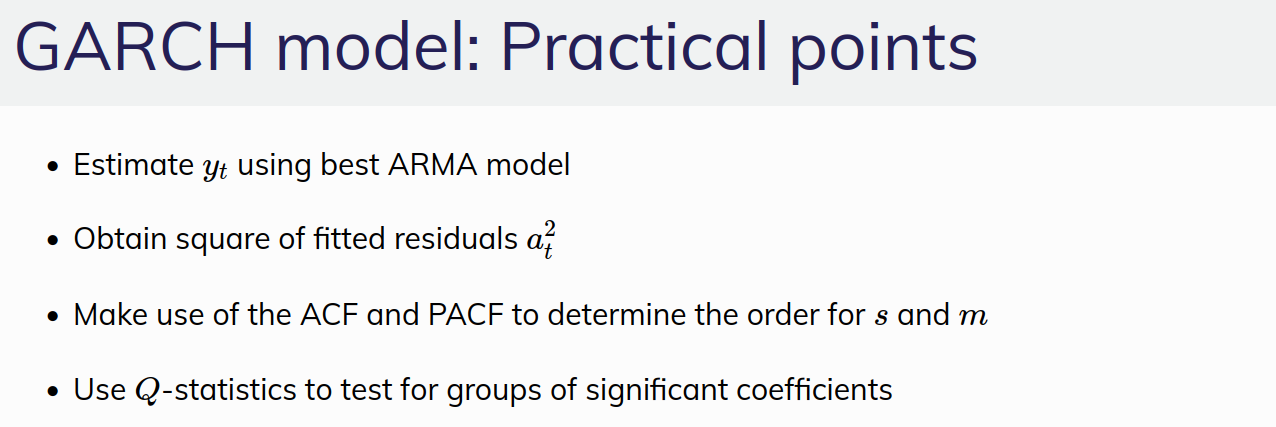

In the context of time series analysis, the Q-statistic is often associated with testing for the presence of autocorrelation in a time series. Autocorrelation refers to the correlation of a time series with its own past values at different lags.

The Q-statistic is used as part of the Ljung-Box test, which is a statistical test for the presence of autocorrelation at lags up to a specified order. The Ljung-Box test helps assess whether there are significant autocorrelations in a time series beyond a certain lag.

Ljung-Box Test:

The Ljung-Box test is a portmanteau test used to check whether any of a group of autocorrelations of a time series are different from zero. It is commonly used in the analysis of residuals from a time series model to identify if there is any remaining autocorrelation in the residuals.
Q-Statistic:

The Q-statistic is a measure used in the Ljung-Box test to quantify the level of autocorrelation in the residuals at multiple lags. For a given lag, the Q-statistic is calculated as the sum of the squares of the autocorrelations of the residuals up to that lag. The formula for the Q-statistic is often written as:

$Q=n\sum_k^h \frac{\rho^2}{n-k}​$

where:

- $n$ is the sample size.
- $h$ is the number of lags being considered.
- $ρ_k$​ is the sample autocorrelation at lag k.

The Q-statistic is then compared to critical values from the chi-squared distribution with hh degrees of freedom to determine whether the autocorrelations are statistically significant.

#First let us load some financial time series data from Yahoo Finance:

In [34]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime

In [35]:
!pip install git+https://github.com/RJT1990/pyflux


  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-ddz10ien
  Running command git clone --filter=blob:none --quiet https://github.com/RJT1990/pyflux /tmp/pip-req-build-ddz10ien
  Resolved https://github.com/RJT1990/pyflux to commit 297f2afc2095acd97c12e827dd500e8ea5da0c0f
  Preparing metadata (setup.py) ... done


[*********************100%%**********************]  1 of 1 completed


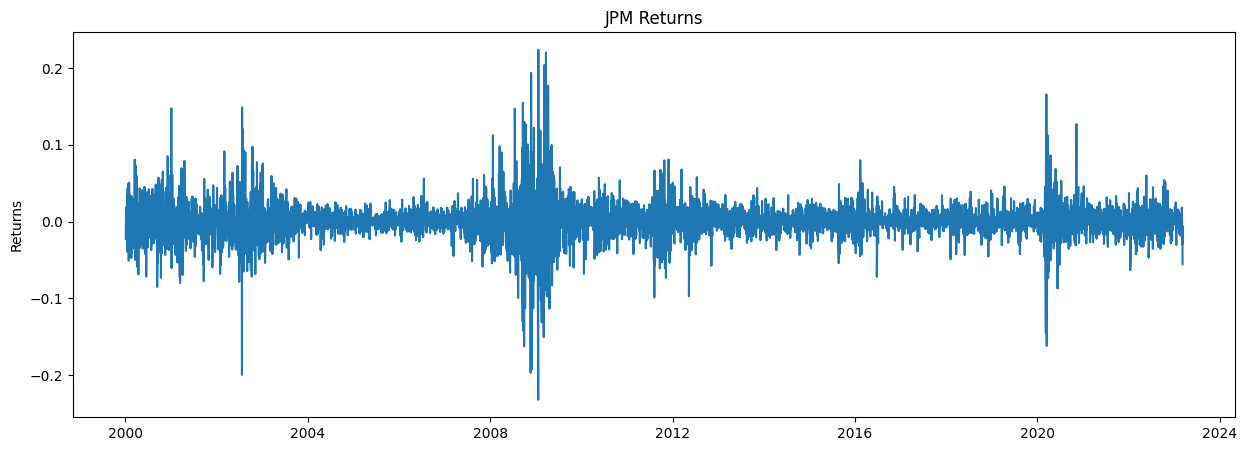

In [36]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical market data from Yahoo Finance
jpm = yf.download('JPM', start='2000-01-01', end='2023-03-10')
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

# Plot the returns
plt.figure(figsize=(15, 5))
plt.plot(returns.index, returns)
plt.ylabel('Returns')
plt.title('JPM Returns')
plt.show()


One way to visualize the underlying volatility of the series is to plot the absolute returns ∣y∣

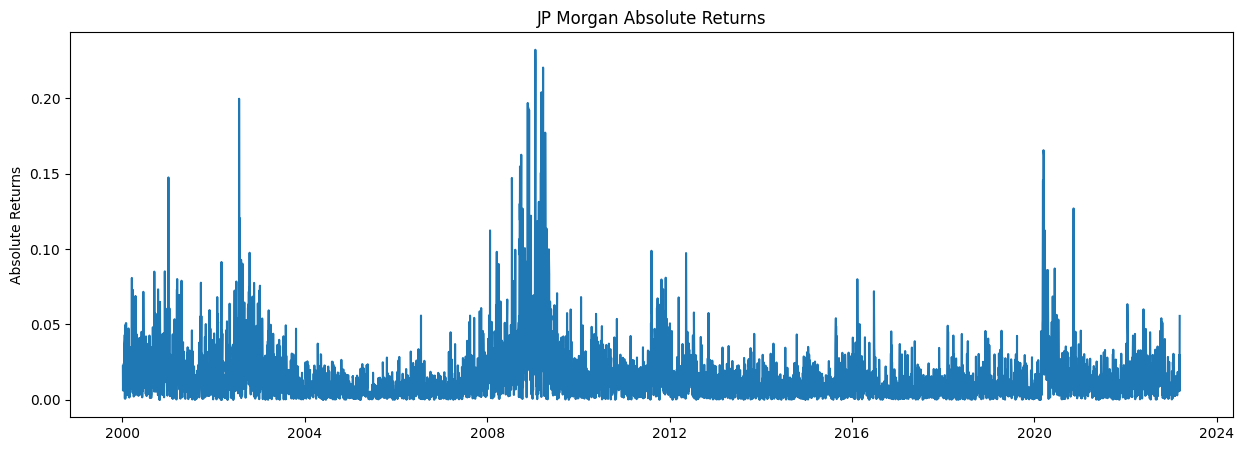

In [37]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

There appears to be some evidence of volatility clustering over this period. Let’s fit a GARCH(1,1) model using a point mass estimate z(MLE):

In [38]:
import numpy as np
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt

# Assume you have already defined and fetched the returns DataFrame
# Example:
# returns = pd.DataFrame({'JPM Returns': [-0.022185, -0.006192, 0.014097, 0.018206, -0.017331]},
#                        index=['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-10'])

# Display the original DataFrame
print("Original DataFrame:")
print(returns)

# Replace ix with iloc
returns.reset_index(drop=True, inplace=True)  # Reset index to integers
transformed_data = returns.iloc[:, 0].values

# Display the modified DataFrame
print("\nModified DataFrame:")
print(transformed_data)


Original DataFrame:
            JPM Returns
2000-01-04    -0.022186
2000-01-05    -0.006192
2000-01-06     0.014097
2000-01-07     0.018207
2000-01-10    -0.017332
...                 ...
2023-03-03     0.018193
2023-03-06    -0.005864
2023-03-07    -0.029849
2023-03-08    -0.005933
2023-03-09    -0.055657

[5832 rows x 1 columns]

Modified DataFrame:
[-0.02218615 -0.00619157  0.01409664 ... -0.0298487  -0.00593297
 -0.05565695]


In [39]:
model = pf.GARCH(transformed_data,p=1,q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 15343.6849                        
End Date: 5831                                          AIC: -30679.3697                                  
Number of observations: 5831                            BIC: -30652.6859                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

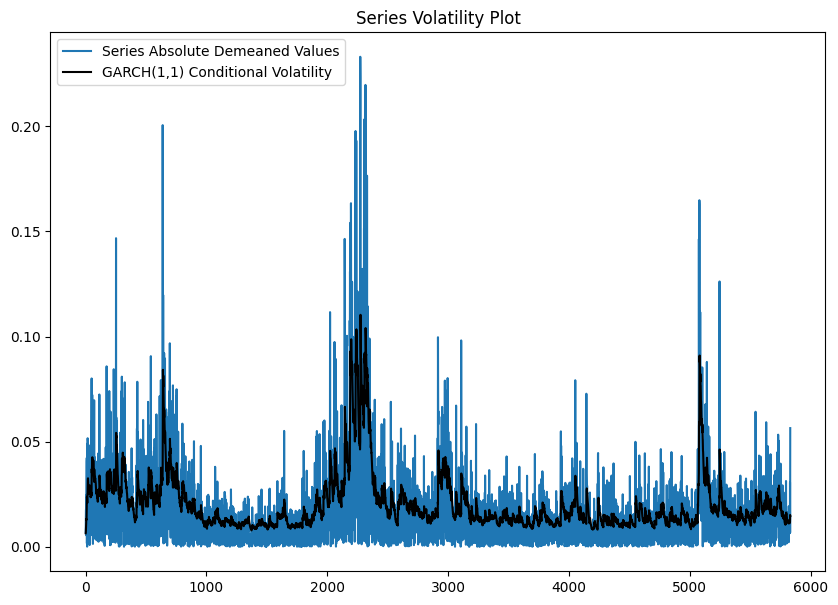

In [40]:
model.plot_fit()

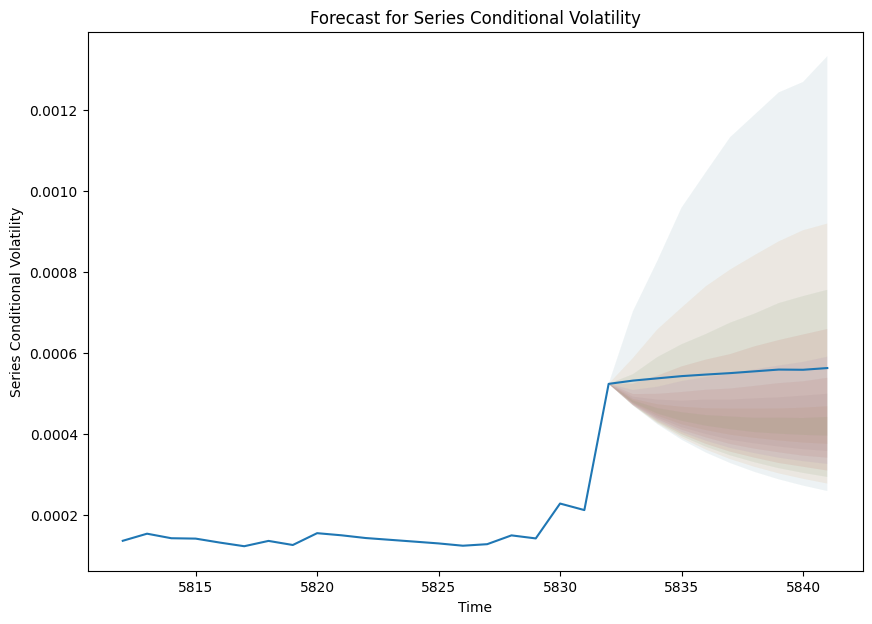

In [41]:
model.plot_predict(h=10)